In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
import warnings
warnings.filterwarnings('ignore')
plt.rc('figure', figsize=(17, 13))
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
from plotly.subplots import make_subplots
pyo.init_notebook_mode

<function plotly.offline.offline.init_notebook_mode(connected=False)>

In [205]:
import re
import string
import nltk 
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize


In [206]:
from wordcloud import wordcloud
from tqdm.auto import tqdm  

In [207]:
df = pd.read_csv(r"C:\Users\padwa\OneDrive - CSULB\Desktop\Youtube project\Linkedin chatGPT Machine Learning\tweets.csv")
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,A Question A Day,What would be the output of the two print stat...,NaN,Simple and basic question on programming langu...,2021-10-28 05:57:40+00:00,463.0,8.0,17,False,2023-04-03 13:29:05+00:00,"['python', 'programming', 'chatGPT']",Buffer
1,Mark Virag,Of interest to my stock-trading tweeps...\n\nI...,North Dallas,"My interests are Automotive F&I (both), Machin...",2015-08-24 14:36:59+00:00,777.0,529.0,770,False,2023-04-03 13:29:00+00:00,['ChatGPT'],TweetDeck Web App
2,The Decision Lab,"ChatGPT can write you a poem, answer philosoph...","Montréal, Québec",TDL is a behavioral design think tank. We appl...,2016-07-21 18:51:59+00:00,4783.0,389.0,76,False,2023-04-03 13:28:53+00:00,NaN,HubSpot
3,Red Clover Advisors,Italy has given OpenAI 20 days to relay measur...,"Atlanta, GA",Privacy consultant helping companies have a pr...,2016-09-13 02:33:33+00:00,357.0,296.0,1154,False,2023-04-03 13:28:37+00:00,NaN,Zoho Social
4,Bitone Great,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommen...,NaN,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1086.0,492.0,47,False,2023-04-03 13:28:27+00:00,"['Sell', 'Bybit', 'Short', 'SXPUSDT']",rsi1


In [208]:
print("Rows          : ", df.shape[0])          #df.shape[0] gives the number of rows in the dataframe.
print("Columns       : ", df.shape[1])          #df.shape[1] gives the number of columns in the dataframe.
print("Features      : ", df.columns.tolist())  #df.columns.tolist() gives the name of  the columns in the dataframe.
print("Missing vlaues:\n", df.isna().sum())     #df.isna().sum() gives the sum of all the NA values in the particular column.
print("Missing vlaues: ", df.isna().sum().values.sum()) #df.isna().sum().values.sum()) gives the sum of the above.

Rows          :  725835
Columns       :  12
Features      :  ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']
Missing vlaues:
 user_name            51343
text                352387
user_location       443941
user_description    379385
user_created        418701
user_followers      418701
user_friends        418701
user_favourites     418701
user_verified       418704
date                418708
hashtags            483741
source              418738
dtype: int64
Missing vlaues:  4641751


In [209]:
print("Unique        :\n", df.nunique()) #df.nunique() gives the count of all the unique values in each column.

Unique        :
 user_name           134030
text                303569
user_location        32413
user_description    134291
user_created        136117
user_followers       33121
user_friends         14341
user_favourites      41452
user_verified           37
date                292749
hashtags             70345
source                 904
dtype: int64


#### Now new feature "sentiment" is created to analize the sentiment of each tweet.

In [210]:
#  converting the values to strings using the astype method before running the analysis
df['text'] = df['text'].astype(str) 

In [211]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores= []
for i in range(len(df['text'])):
    score = analyser.polarity_scores(df['text'][i])         # analyzes the polarity of the text
    score = score['compound']               
    scores.append(score)
sentiment = []

for i in scores:                                            # Soting  
    if i >= 0.05:
        sentiment.append('Positive')                        
    elif i <= (-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment'] = pd.Series(np.array(sentiment))

Explanation of the above code:

1. This code uses the VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis tool to analyze the sentiment (positive, negative, or neutral) of the text in the df['text'] column.

2. First, the code imports the SentimentIntensityAnalyzer class from the vaderSentiment package and creates an instance of it named analyser.

3. Then, a list named scores is initialized to store the sentiment scores (polarity scores) of each text. A for loop is used to iterate through each text in the df['text'] column.

4. Inside the loop, the polarity_scores() method of the analyser object is called on each text to obtain a dictionary of sentiment scores for the text. The compound score is extracted from the dictionary, which represents an overall sentiment score ranging from -1 (most negative) to 1 (most positive).

5. The compound score is then appended to the scores list.

6. Finally, an empty list named sentiment is initialized to store the sentiment labels (positive, negative, or neutral) based on the compound score.

In [212]:
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment
0,A Question A Day,What would be the output of the two print stat...,NaN,Simple and basic question on programming langu...,2021-10-28 05:57:40+00:00,463.0,8.0,17,False,2023-04-03 13:29:05+00:00,"['python', 'programming', 'chatGPT']",Buffer,Neutral
1,Mark Virag,Of interest to my stock-trading tweeps...\n\nI...,North Dallas,"My interests are Automotive F&I (both), Machin...",2015-08-24 14:36:59+00:00,777.0,529.0,770,False,2023-04-03 13:29:00+00:00,['ChatGPT'],TweetDeck Web App,Positive
2,The Decision Lab,"ChatGPT can write you a poem, answer philosoph...","Montréal, Québec",TDL is a behavioral design think tank. We appl...,2016-07-21 18:51:59+00:00,4783.0,389.0,76,False,2023-04-03 13:28:53+00:00,NaN,HubSpot,Neutral
3,Red Clover Advisors,Italy has given OpenAI 20 days to relay measur...,"Atlanta, GA",Privacy consultant helping companies have a pr...,2016-09-13 02:33:33+00:00,357.0,296.0,1154,False,2023-04-03 13:28:37+00:00,NaN,Zoho Social,Positive
4,Bitone Great,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommen...,NaN,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1086.0,492.0,47,False,2023-04-03 13:28:27+00:00,"['Sell', 'Bybit', 'Short', 'SXPUSDT']",rsi1,Negative


### Exploratory data analysis (Performed Below)

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

EDA is an important first step in any data analysis. Understanding where outliers occur and how variables are related can help one design statistical analyses that yield meaningful results.

In [213]:
temp1=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='sentiment', ascending=False)
temp1.style.background_gradient(cmap='Blues')

# Order by sentiment

,sentiment,text
2,Positive,173738
1,Neutral,498625
0,Negative,53472


In [214]:
temp2=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='text', ascending=False)
temp2.style.background_gradient(cmap='Blues')

# Order by text

,sentiment,text
1,Neutral,498625
2,Positive,173738
0,Negative,53472


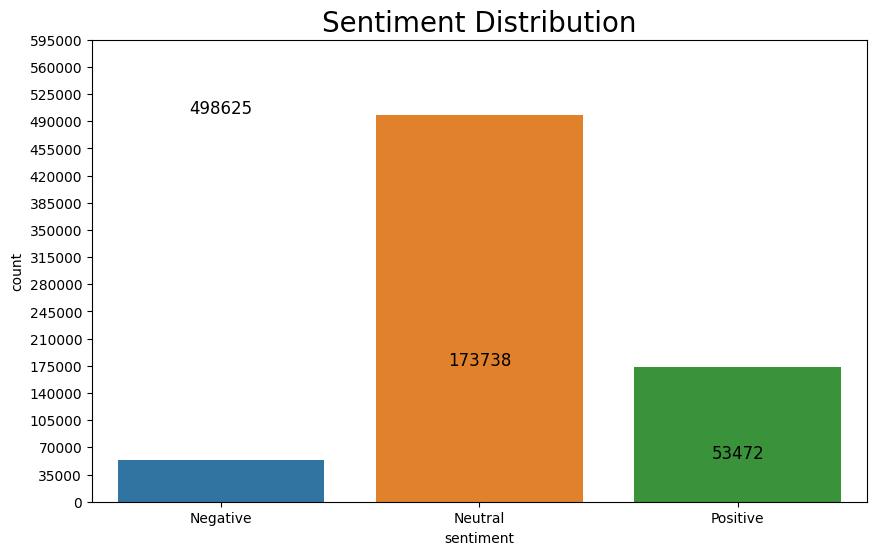

In [249]:
plt.figure(figsize=(10, 6))
# sns.countplot(df['sentiment'])
sns.countplot(x='sentiment', data = df)
plt.title('Sentiment Distribution', fontsize = 20)
plt.yticks(range(0, 600000, 35000))

# add count labels to the top of each bar
for i in range(len(df['sentiment'].value_counts())):
    count = df['sentiment'].value_counts()[i]
    plt.text(i, count+2000, str(count), ha='center', fontsize=12)

plt.show()

Text(0.5, 1.0, 'Sentiment Distribution in terms of %')

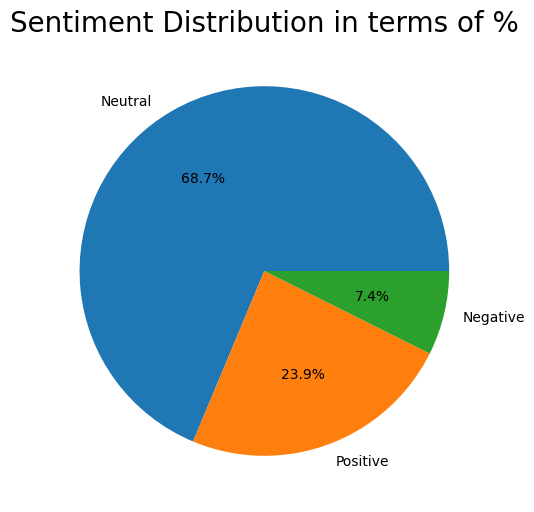

In [240]:
plt.figure(figsize=(6, 6))
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.1f%%')

plt.title('Sentiment Distribution in terms of %', fontsize=20)